In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


In [12]:
f_x30 = open('30_single/VCS_fields_TT_x_ROM.txt', 'r')
x30 = np.loadtxt(f_x30)
print(x30.shape)
f_y30 = open('30_single/VCS_fields_TT_y_ROM.txt', 'r')
y30 = np.loadtxt(f_y30)
print(y30.shape)
f_x28 = open('28_single/VCS_fields_TT_x_ROM.txt', 'r')
x28 = np.loadtxt(f_x28)
print(x28.shape)
f_y28 = open('28_single/VCS_fields_TT_y_ROM.txt', 'r')
y28 = np.loadtxt(f_y28)
print(y28.shape)

(100000, 20)
(100000, 22)
(100000, 20)
(100000, 22)


In [13]:
dim_x = int(x30.shape[1])
dim_y = int(y30.shape[1])
print(dim_x)
print(dim_y)
#f_sample_grid_d1 = open('sample_grid_d1.txt', 'r')
#sample_grid_d1 = 2*(np.loadtxt(f_sample_grid_d1) - 0.5)
#sample_grid_d1 = np.loadtxt(f_sample_grid_d1)
#print(sample_grid_d1)
#f_sample_grid_d2 = open('sample_grid_d2.txt', 'r')
#sample_grid_d2 = 10*(np.loadtxt(f_sample_grid_d2) - 0.1)
#sample_grid_d2 = np.loadtxt(f_sample_grid_d2)
#print(sample_grid_d2)

20
22


In [96]:
# the sample_grid are the rom_coords including the parameter
# the train_values are the rom_coords at the next step
#
x30_sample_grid_tmp = np.delete(x30, (x30.shape[0]-1), axis=0)
x30_train_values = np.delete(x30, (0), axis=0)
#print(x30)
#print(x30_sample_grid_tmp)
#print(x30_train_values)
x30_sample_grid = 30*np.ones((x30_sample_grid_tmp.shape[0],x30_sample_grid_tmp.shape[1]+1))
x30_sample_grid[:,:-1] = x30_sample_grid_tmp
#print(x30_sample_grid)
print(x30_sample_grid.shape)
print(x30_train_values.shape)

# build the sample and train matrices when going over two timesteps
x30_twostep = np.zeros((x30.shape[0]-1,x30.shape[1]*2))
x30_twostep[:,0:x30.shape[1]] = x30[:-1,:]
x30_twostep[:,x30.shape[1]:2*x30.shape[1]] = x30[1:,:]
print(x30_twostep.shape)
x30_sample_grid_tmp = np.delete(x30_twostep, (x30_twostep.shape[0]-1), axis=0)
x30_train_values = np.delete(x30_twostep, (0), axis=0)
x30_sample_grid = 30*np.ones((x30_sample_grid_tmp.shape[0],x30_sample_grid_tmp.shape[1]+1))
x30_sample_grid[:,:-1] = x30_sample_grid_tmp
print(x30_sample_grid.shape)
print(x30_train_values.shape)
x30_3step = np.zeros((x30.shape[0]-2,x30.shape[1]*3))
x30_3step[:,0:x30.shape[1]] = x30[:-2,:]
x30_3step[:,x30.shape[1]:2*x30.shape[1]] = x30[1:-1,:]
x30_3step[:,2*x30.shape[1]:3*x30.shape[1]] = x30[2:,:]
print(x30_3step.shape)
x30_sample_grid_tmp = np.delete(x30_3step, (x30_3step.shape[0]-1), axis=0)
x30_train_values = np.delete(x30_3step, (0), axis=0)
x30_sample_grid = 30*np.ones((x30_sample_grid_tmp.shape[0],x30_sample_grid_tmp.shape[1]+1))
x30_sample_grid[:,:-1] = x30_sample_grid_tmp
print(x30_sample_grid.shape)
print(x30_train_values.shape)


(99999, 21)
(99999, 20)
(99999, 40)
(99998, 41)
(99998, 40)
(99998, 60)
(99997, 61)
(99997, 60)


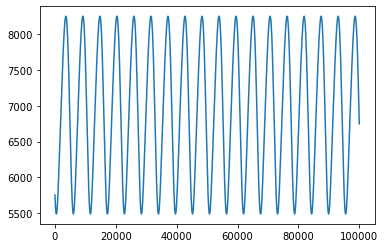

In [97]:
#train_values = samples_optimal_clustering.reshape(110)
#train_values = np.concatenate((lcs0, lcs1, lcs2, lcs3, lcs4, lcs5, lcs6, lcs7))
#print(train_values)
#train_values = np.reshape(train_values,(lcs0.shape[0],8), order='F')
#print(train_values.shape)
#train_values = 1./train_values
#np.argmax(train_values, axis = 1)
#for i in range(0,train_values.shape[0]):
#    sum_row = np.sum(train_values[i,:])
#    train_values[i,:] = train_values[i,:] / sum_row
    #print(sum_row)
#print(train_values)
#train_values = np.transpose(trainANN)
#print(trainANN)
#print(train_values.shape)
#print(train_values.shape[1])
fig, ax = plt.subplots()  # Create a figure containing a single axes.
#ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.
ax.plot(x30[:,0])

In [105]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=[x30_sample_grid.shape[1]]),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),    
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(x30_train_values.shape[1])
])

In [106]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [108]:
model.fit(x30_sample_grid, x30_train_values, epochs=50)

Epoch 1/50
3125/3125 [==============================] - 195s 62ms/step - loss: 74297.3281 - mae: 49.9302 - mse: 74297.3281
Epoch 2/50
3125/3125 [==============================] - 229s 73ms/step - loss: 44145.9844 - mae: 73.1350 - mse: 44145.9844
Epoch 3/50
3125/3125 [==============================] - 235s 75ms/step - loss: 607.8532 - mae: 8.8789 - mse: 607.8532
Epoch 4/50
3125/3125 [==============================] - 241s 77ms/step - loss: 528.1735 - mae: 7.5537 - mse: 528.1735
Epoch 5/50
3125/3125 [==============================] - 242s 77ms/step - loss: 627.9407 - mae: 7.4453 - mse: 627.9407
Epoch 6/50
3125/3125 [==============================] - 131s 42ms/step - loss: 335.9184 - mae: 6.2492 - mse: 335.9184
Epoch 7/50
3125/3125 [==============================] - 137s 44ms/step - loss: 403.5119 - mae: 6.3288 - mse: 403.5119
Epoch 8/50
3125/3125 [==============================] - 130s 42ms/step - loss: 354.9436 - mae: 5.7459 - mse: 354.9436
Epoch 9/50
3125/3125 [========================

In [112]:
# use the ROM to time-step given the first reduced coordinate representation
current_estimate = x30_sample_grid[0,:]
estimated_trajectory = 0*x30_sample_grid
estimated_trajectory[0,:] = current_estimate
nn = np.r_[current_estimate, 30]
print(current_estimate)
print(x30_sample_grid.shape)
print(nn)
print(x30_sample_grid[0:1,:])
for i in range(0,x30_sample_grid.shape[0]):
    next_estimate = model.predict(estimated_trajectory[i:i+1,:])
    estimated_trajectory[i+1,:-1] = next_estimate
    print(i)
    
#fig, ax = plt.subplots()    
#ax.plot(x30[:,0])
#ax.plot(estimated_trajectory[:,0])

[ 5.75274955e+03  5.41552348e+03  4.43526365e+02 -3.14881236e+02
  2.73886204e+02 -2.67640782e+02 -1.37449642e+02  4.92411893e+01
 -1.06984066e+02  1.60953086e+01  5.19771460e+00  6.42608304e+00
 -2.32909101e+00 -4.78548525e+00 -6.92172735e+00  4.60403384e+00
  3.96189197e+00  1.90554095e+00 -1.99106091e+01  8.16375429e+00
  5.75165561e+03  5.41490095e+03  4.41823171e+02 -3.14253826e+02
  2.73583414e+02 -2.67766247e+02 -1.37328002e+02  4.92340534e+01
 -1.06958310e+02  1.61134791e+01  5.19569280e+00  6.42487497e+00
 -2.32744139e+00 -4.78158248e+00 -6.92501879e+00  4.59834008e+00
  3.95403744e+00  1.89977761e+00 -1.99094891e+01  8.16219945e+00
  5.75056410e+03  5.41427517e+03  4.40118368e+02 -3.13625561e+02
  2.73279991e+02 -2.67891923e+02 -1.37205336e+02  4.92274400e+01
 -1.06932641e+02  1.61317889e+01  5.19365005e+00  6.42373273e+00
 -2.32604377e+00 -4.77753907e+00 -6.92856701e+00  4.59263101e+00
  3.94583987e+00  1.89295461e+00 -1.99077719e+01  8.16072875e+00
  3.00000000e+01]
(99997,

1259
1260
1261
1262
1263
1264
1265
1266
1267
1268
1269
1270
1271
1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458


2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100


4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724
4725
4726
4727
4728
4729
4730
4731
4732
4733
4734
4735
4736
4737
4738
4739
4740
4741
4742
4743
4744


6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362
6363
6364
6365
6366
6367
6368
6369
6370
6371
6372
6373
6374
6375
6376
6377
6378
6379
6380
6381
6382
6383
6384


7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914
7915
7916
7917
7918
7919
7920
7921
7922
7923
7924
7925
7926
7927
7928
7929
7930
7931
7932
7933
7934
7935
7936
7937
7938
7939
7940
7941
7942
7943
7944
7945
7946
7947
7948
7949
7950
7951
7952
7953
7954
7955
7956
7957
7958
7959
7960
7961
7962
7963
7964
7965
7966
7967
7968
7969
7970
7971
7972
7973
7974
7975
7976
7977
7978
7979
7980
7981
7982
7983
7984
7985
7986
7987
7988
7989
7990
7991
7992
7993
7994
7995
7996
7997
7998
7999
8000
8001
8002
8003
8004
8005
8006
8007
8008
8009
8010
8011
8012
8013
8014
8015
8016
8017
8018
8019
8020
8021
8022
8023


9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517
9518
9519
9520
9521
9522
9523
9524
9525
9526
9527
9528
9529
9530
9531
9532
9533
9534
9535
9536
9537
9538
9539
9540
9541
9542
9543
9544
9545
9546
9547
9548
9549
9550
9551
9552
9553
9554
9555
9556
9557
9558
9559
9560
9561
9562
9563
9564
9565
9566
9567
9568
9569
9570
9571
9572
9573
9574
9575
9576
9577
9578
9579
9580
9581
9582
9583
9584
9585
9586
9587
9588
9589
9590
9591
9592
9593
9594
9595
9596
9597
9598
9599
9600
9601
9602
9603
9604
9605
9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662


KeyboardInterrupt: 

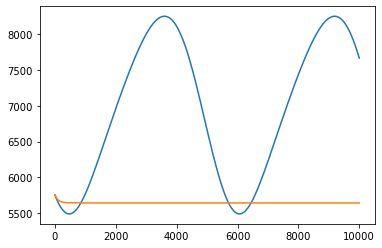

In [113]:
fig, ax = plt.subplots()    
ax.plot(x30[0:10000,0])
ax.plot(estimated_trajectory[0:10000,0])

In [ ]:
np.argmax(train_values, axis = 1)

In [ ]:
np.argmax(pred_sg, axis=1) - np.argmax(train_values, axis = 1)

In [ ]:
f_fine_sample_grid = open('fine_sample_grid.txt', 'r')
fine_sample_grid = np.loadtxt(f_fine_sample_grid)
print(fine_sample_grid.shape)
print(fine_sample_grid)

In [ ]:
pred_fsg = model.predict(fine_sample_grid)
np.set_printoptions(threshold=np.inf)
print(pred_fsg.shape)
np.savetxt('pred_fsg.txt', pred_fsg)
#np.argmax(pred_fsg, axis=1)

In [ ]:
#f_combination_optimal_c = open('combination_optimal_c.txt', 'r')
#combination_optimal_c = np.loadtxt(f_combination_optimal_c)
#print(combination_optimal_c)
#print(sample_grid.shape)
#print(train_values.shape)
#print(combination_optimal_c.shape)
#detailed_train_values = combination_optimal_c.reshape(1640)
#print(detailed_train_values.shape)

In [ ]:
#model_2 = keras.Sequential([
#    keras.layers.Dense(2, activation='relu'),
#    keras.layers.Dense(1024, activation='relu'),
#    keras.layers.Dense(1024, activation='relu'),
#    keras.layers.Dense(8, activation='softmax')
#])
#model_2.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
#model_2.fit(fine_sample_grid, detailed_train_values, epochs=500)

In [ ]:
#pred_mod2 = model_2.predict(fine_sample_grid)
#save_pred_mod2_fsg = np.argmax(pred_mod2, axis=1)
#np.savetxt('save_pred_mod2_fsg.txt', save_pred_mod2_fsg)

In [ ]:
pred_mod1 = np.argmax(pred_fsg, axis=1)
#np.savetxt('smart_save_pred_mod1_fsg.txt', pred_mod1)